<a href="https://colab.research.google.com/github/HusseinBitambuka/maize-images-classification/blob/main/maize_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rarfile


In [14]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from google.colab import drive
import shutil
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import cv2
import matplotlib.pyplot as plt


In [ ]:

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
'''
zip_file_path = '/content/drive/MyDrive/dataverse_files.zip'

# Path to the directory where you want to extract the contents
extracted_dir_path = '/content/extracted_data'


# Create the directory for extracted data
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the contents of the zip file in Google Drive
!unzip -q "$zip_file_path" -d "$extracted_dir_path"

# Path to the destination directory in Google Drive
destination_dir = '/content/drive/MyDrive/dataverse_df'

# Create the destination directory if it doesn't exist

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
# Move the extracted folder to the destination directory in Google Drive
!mv "$extracted_dir_path" "$destination_dir"

print('Zip folder extracted and moved to Google Drive successfully!')

'''


Zip folder extracted and moved to Google Drive successfully!


In [ ]:
'''
# Path to the directory containing RAR files in Google Drive
rar_files_dir = '/content/drive/MyDrive/dataverse_df/extracted_data'

# Path to the directory where you want to save the extracted images
output_dir = '/content/drive/MyDrive/extracted_images'

# Create the directory for extracted images
os.makedirs(output_dir, exist_ok=True)

# Iterate over the files in the directory
for file_name in os.listdir(rar_files_dir):
    file_path = os.path.join(rar_files_dir, file_name)
    if os.path.isfile(file_path) and file_name.lower().endswith('.rar'):
        # Extract the images from the RAR file
        with rarfile.RarFile(file_path, 'r') as rar_ref:
            for member in rar_ref.infolist():
                # Check if the file is an image (you can adjust the image extensions as needed)
                if member.filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                    # Extract the image file
                    rar_ref.extract(member, path=output_dir)

print('Images extracted and saved to Google Drive successfully!')

'''



Images extracted and saved to Google Drive successfully!


In [3]:
def load_data(parent_folder, width, height):
    images = []
    labels = []
    label_map = {'Healthy_1': 'Healthy', 'Healthy_2': 'Healthy',
                 'MLB_1': 'MLB', 'MLB_2': 'MLB',
                 'MSV_1': 'MSV', 'MSV_2': 'MSV'}

    for folder_name in os.listdir(parent_folder):
        folder_path = os.path.join(parent_folder, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, file_name)
                image = cv2.imread(image_path)
                # Resize the image to a fixed size if needed
                image = cv2.resize(image, (width, height))
                images.append(image)
                labels.append(label_map[folder_name])

    return images, labels

# New Section

In [4]:
# Path to the parent folder containing the images
parent_folder = '/content/drive/MyDrive/extracted_images'
width = 100
height = 100
# Load images and labels
images, labels = load_data(parent_folder, width, height)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.25, random_state=42)
# Preprocess the images (normalize pixel values)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0



In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform label encoder on training labels
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Transform test labels using the fitted label encoder
test_labels_encoded = label_encoder.transform(test_labels)

In [9]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)  # No activation function in the last layer
])

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Epoch 1/10
371/371 [==============================] - 6s 16ms/step - loss: 1.4822e-04 - accuracy: 1.0000 - val_loss: 0.3534 - val_accuracy: 0.9474
Epoch 2/10
371/371 [==============================] - 5s 13ms/step - loss: 7.5284e-05 - accuracy: 1.0000 - val_loss: 0.3641 - val_accuracy: 0.9484
Epoch 3/10
371/371 [==============================] - 5s 13ms/step - loss: 5.3089e-05 - accuracy: 1.0000 - val_loss: 0.3723 - val_accuracy: 0.9479
Epoch 4/10
371/371 [==============================] - 5s 13ms/step - loss: 3.9749e-05 - accuracy: 1.0000 - val_loss: 0.3802 - val_accuracy: 0.9484
Epoch 5/10
371/371 [==============================] - 5s 14ms/step - loss: 3.0988e-05 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 0.9492
Epoch 6/10
371/371 [==============================] - 5s 13ms/step - loss: 2.4418e-05 - accuracy: 1.0000 - val_loss: 0.3959 - val_accuracy: 0.9482
Epoch 7/10
371/371 [==============================] - 5s 13ms/step - loss: 1.9769e-05 - accuracy: 1.0000 - val_loss: 0

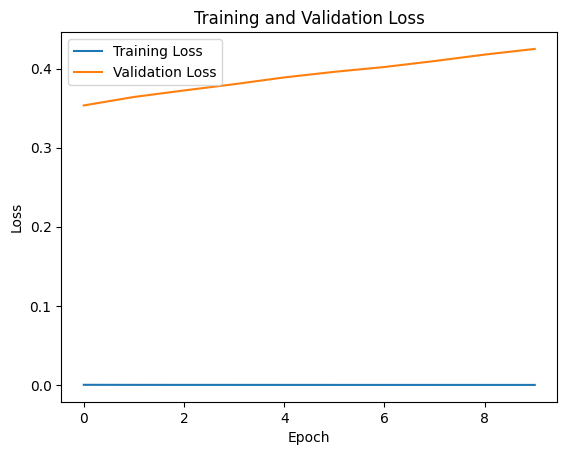

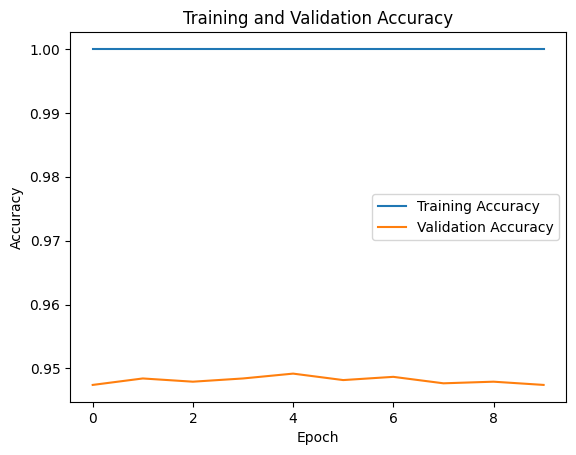

In [15]:

# Get the training history
history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(test_images, test_labels_encoded))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



The graph I ploted it after trainig the model.